<a href="https://colab.research.google.com/github/srmalasani/srmalasani/blob/master/SRR189389_scaffold_166_ShyamMalasani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this work is to identify novel transposable elements (TE) from various populations of _Drosophila melanogaster_ with genomic sequencing data that have been collected from around the world. Dr. Ellison created a computational workflow that assembles sequences from each population that do not match the _D. melanogaster_ reference genome. We need to further characterize these sequences. Some will be TEs that are already known but missing from the reference genome. Some will be other repetitive elements, like DNA satellites. Others will hopefully be novel TEs that are unique to specific _D. melanogaster_ populations. Follow the steps below to gather information about each sequence (aka scaffold). Record your results in the [Google Spreadsheet](https://docs.google.com/spreadsheets/d/1t2BPj9krh7KeqCOPzKpIyl6iPzwmP_58AJ5pLL2fJO4/edit?usp=sharing)

_Every time your notebook reconnects to a Runtime, you have to reinstall the software below_

In [ ]:
!pip install -U https://github.com/conda-incubator/condacolab/archive/cuda-version-12.tar.gz
import condacolab
condacolab.install()

     - 35.4 kB 10.6 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for condacolab: filename=condacolab-0.1.7-py3-none-any.whl size=7213 sha256=9365a96b6520735412686587e713cff31b9edf8c9e2e6b46b08195c64532948c
  Stored in directory: /root/.cache/pip/wheels/40/52/76/1ad2aa50f9ab880cfc0e418db37f474f468d2920eab048baa2
Successfully built condacolab
✨🍰✨ Everything looks OK!


In [ ]:
!mamba install -y -qq -c conda-forge -c bioconda biopython emboss blast bioconda::bioconductor-biostrings
!git clone https://github.com/clemgoub/TE-Aid.git
!apt-get install poppler-utils
!pip install pdf2image

fatal: destination path 'TE-Aid' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


### Before you begin
Rename your notebook by clicking `blank_notebook.ipynb` at the top of this webpage. Paste in your scaffold ID followed by an underscore and your name, for example:

`SRR189052_scaffold_467_ChrisEllison.ipynb`

### 1. Mount your Google Drive folder
_You will need to do this everytime your notebook reconnects to a Runtime._

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s /content/drive/MyDrive/novel_TE_project_Fall_2024/

Mounted at /content/drive


### 2. Analyze your scaffold
_You can find the sequence and population IDs in the Google spreadsheet_

In [ ]:
# @markdown ##### Fill in the information below and click the play button:
seqID="SRR189389_scaffold_166" #@param {type:"string"}
popID="DPGP2" #@param {type:"string"}

from Bio import SeqIO
from statistics import median
# GET COVERAGE
covfile="novel_TE_project_Fall_2024/" + popID + "_scaffold.cov"
(SRR,s,n) = seqID.split("_")
fh=open(covfile)
covlist=[]
seqCov=0
for line in fh:
  line=line.rstrip().split("\t")
  if line[0] == seqID:
    seqCov=float(line[2])
  elif SRR in line[0]:
    covlist.append(float(line[2]))
fh.close()
print("SEQUENCE ID:",seqID)
print("COPIES:",seqCov/median(covlist))

# GET CLUSTER INFO
clustfile="novel_TE_project_Fall_2024/" + popID + "_cluster.tsv"
fh=open(clustfile)
count=0
for line in fh:
  line=line.rstrip().split("\t")
  if line[0]==seqID:
    count+=1
fh.close()
print("CLUSTER:",seqID,"is in a cluster with a total of",count,"sequences.")

#GET CLASSIFICATION
classfile="novel_TE_project_Fall_2024/" + popID + ".classified.tsv"
fh=open(classfile)
classi="missing"
for line in fh:
  line=line.rstrip().split("\t")
  if line[1]==seqID:
    classi=line[2]
fh.close()
print("CLASSIFICATION:",classi)

# GET SCAFFOLD SEQUENCE
fastafile = "novel_TE_project_Fall_2024/" + popID + ".filtered.fa"
outfasta=seqID + ".fa"
found=""
for record in SeqIO.parse(fastafile, "fasta"):
    #record.id tells you the name of the scaffold
    if record.id == seqID:
      found=record
      SeqIO.write(record,outfasta,"fasta")
print("\nScaffold saved to FASTA file:", outfasta)
print("\n")
print("Scaffold sequence is below:\n")
print(found.format("fasta"))

SEQUENCE ID: SRR189389_scaffold_166
COPIES: 4.4
CLUSTER: SRR189389_scaffold_166 is in a cluster with a total of 1 sequences.
CLASSIFICATION: Drosophila melanogaster (taxid 7227)

Scaffold saved to FASTA file: SRR189389_scaffold_166.fa


Scaffold sequence is below:

>SRR189389_scaffold_166 scaffold_166
CTGCGTGGTTTCAGCGTGTTTGCAGACGACTTGTTGCTCTTCGTTGAGGGTCGTACCCGA
ATCGAACTGGAGTCGAAAGGCGAACACCTCATGTCCGTTGTTGGTGCATGGGGAGCGGAG
GTCGGCGTTGCCGTCTATACCAGCAAGAATGCGATGCTGCTGCTGCATTTTGCCCGGAGT
AGGCACCCTACGGTACGGTTTGCAGGAGCAGGCCTGCCGTATCTTAATAAATACCGGCAC
CTTGGCGTTACAGTTGTCGAGCGGTTGAATGTTTTTCCGAGTATCAAGTCGCTACGAGAT
CTTCTAACTGGAGTTGTGTTGTCCACGCGCCAGACGGACCATATATGTCGAACTCATGGT
GCCATGTGCCTTGTTGGGTGCATCGGTCTGATGGACACAGCTATGCCATGGGGCATCTGG
TCTCCTGCCAGAGGAAAATCCTGCTTGAATGTCTATCGGTATGCCGTACAGTGTCCACTG
TGGCAATGCAGGTGCTTGGTGGCGCTCCCCCACTCGACTTAGCCGCCAAGTGCGCGGCGG
TCAGAGTAATGCTTCGACTGAACTACCCATTGAAGACGTCAAAATGCATGTATGGCGAGG
TCCTGCCTGGTCTGAGCTGGACTCACAATATGGCGAGACCGGACGAATGATTTATGCGCA
TATATGAACGCCGTAGTTGGTTGTAA

### 3. BLAST against TE proteins
_This runs a BLAST search within your notebook that will report whether your scaffold contains sequence(s) with similarity to known TE proteins_

**NOTE:** if there is no output produced when you run this cell, it means that no TE proteins were found in your sequence. In this case, please enter "NA" for the corresponding cell in the spreadsheet

In [ ]:
#@markdown _Filename of your scaffold FASTA file produced in Step 2._

Scaffold_Fasta="SRR189389_scaffold_166.fa" #@param {type:"string"}
!blastx -query $Scaffold_Fasta -db novel_TE_project_Fall_2024/RepeatPeps.lib -evalue 1e-4 -outfmt 6

SRR189389_scaffold_166	R1_DPe_pol#LINE/R1	63.208	106	39	0	1	318	654	759	1.55e-49	101
SRR189389_scaffold_166	R1_DPe_pol#LINE/R1	52.874	87	41	0	414	674	809	895	1.55e-49	96.3
SRR189389_scaffold_166	R1_DPe_pol#LINE/R1	76.000	25	5	1	323	397	774	797	1.55e-49	40.4
SRR189389_scaffold_166	R1_DSe_pol#LINE/R1	50.980	102	49	1	369	674	795	895	1.43e-45	96.7
SRR189389_scaffold_166	R1_DSe_pol#LINE/R1	59.223	103	42	0	10	318	658	760	1.43e-45	92.8
SRR189389_scaffold_166	R1_DSe_pol#LINE/R1	72.727	22	6	0	323	388	775	796	1.43e-45	35.0
SRR189389_scaffold_166	R1-1_DBi_pol#LINE/R1	60.377	106	40	1	7	318	655	760	7.17e-45	99.8
SRR189389_scaffold_166	R1-1_DBi_pol#LINE/R1	52.326	86	41	0	417	674	810	895	7.17e-45	84.3
SRR189389_scaffold_166	R1-1_DBi_pol#LINE/R1	61.290	31	12	0	326	418	776	806	7.17e-45	38.5
SRR189389_scaffold_166	R1_DM_pol#LINE/R1	49.020	102	51	1	369	674	797	897	7.14e-44	96.7
SRR189389_scaffold_166	R1_DM_pol#LINE/R1	54.369	103	47	0	10	318	660	762	7.14e-44	87.0
SRR189389_scaffold_166	R1_DM_pol#LINE/R1	7

### 4. BLAST against the _nt_ database
_The nt database is massive, so this search must be performed on the BLAST [website](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastn&BLAST_SPEC=GeoBlast&PAGE_TYPE=BlastSearch)_

1. Copy your scaffold sequence above and paste it into the website form as the query
2. Make sure _Nucleotide collection (nr/nt)_ is selected as the database, and click BLAST
3. Take a screenshot of the _Sequences producing significant alignments_ table that includes the top 10 hits
4. Click the _Taxonomy_ tab and take a screenshot of that table
5. See the Basecamp Message board for instructions on what to do with your screenshots


![BLAST nt results](https://public.3.basecamp.com/p/r2YSXoZoWgHChoTW7MhV1Xme/upload/download/SRR189389_scaffold_166.png?disposition=attachment)

![BLAST nt taxonomy](https://public.3.basecamp.com/p/Zpg7zYoNUD7m49tKi7eUBagq/upload/download/SRR189389_scaffold_166.png?disposition=attachment)

### 5. BLAST against the _WGS_ database
Follow the same instructions as above with the following exceptions:
1. Select _Whole-genome shotgun contigs_ for the database.
2. Specify `Drosophilidae (taxid:7214)` for Organism
3. Note that the _Taxonomy_ tab is not available for this search, so only take one screenshot





![BLAST WGS results](https://public.3.basecamp.com/p/w9o29DqcnHNz4h8FAiSF38Nc/upload/download/SRR189389_scaffold_166.png?disposition=attachment)

You also need to display the _hit table_ from your _WGS_ search.

1. On the WGS BLAST results page, click the `Alignments` tab
2. Click the `Download` dropdown menu and select `Hit Table (CSV)`
3. In your Colab notebook, click the folder icon on the left and then the upload button which looks like a piece of paper with a arrow on it.
4. Find the Hit Table file that you downloaded to your computer and upload it.
5. Paste the filename into the cell below and run the cell to create the Hit Table.
6. Click the blue table icon on the right of the output to convert it to an interactive table.

In [ ]:
#@markdown _Filename of the Hit Table CSV file._

Hit_Table="FD98035V013-Alignment-HitTable.csv" #@param {type:"string"}
import pandas as pd
df = pd.read_csv(Hit_Table,names=["Query","Target","%identity","Align_Len","Mismatch","Gapopen","Qstart","Qend","Sstart","Send","Evalue","Bitscore"])
df

,Query,Target,%identity,Align_Len,Mismatch,Gapopen,Qstart,Qend,Sstart,Send,Evalue,Bitscore
0,Query_3046415,PGRP01000122.1,99.790,477,1,0,2539,3015,13299,13775,0.0,876.0
1,Query_3046415,PGRW01000002.1,99.789,474,1,0,2542,3015,7641046,7640573,0.0,870.0
2,Query_3046415,PGRW01000002.1,99.578,474,2,0,2542,3015,261592,261119,0.0,865.0
3,Query_3046415,PGRW01000002.1,99.371,477,3,0,2539,3015,2910104,2910580,0.0,865.0
4,Query_3046415,PGRW01000002.1,99.578,474,2,0,2542,3015,7529987,7529514,0.0,865.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Query_3046415,AAKO01001407.1,99.789,474,1,0,2542,3015,33519,33046,0.0,870.0
1210,Query_3046415,AAKO01000455.1,99.581,477,2,0,2539,3015,2968,3444,0.0,870.0
1211,Query_3046415,AAGH01025708.1,99.789,474,1,0,2542,3015,579,106,0.0,870.0
1212,Query_3046415,AAGH01003855.1,99.789,474,1,0,2542,3015,1854,1381,0.0,870.0


### 6. CENSOR search against RepBase TE database

_This search must be performed on the CENSOR [website](https://www.girinst.org/censor/)_
1. Copy your scaffold sequence above and paste it in the Query box
2. Select _Drosophila_ as the Sequence Source
3. Click _Submit Sequence_.

_It will look like nothing is happening but you just have to wait a few minutes. Eventually there should be a screen that says **Done** with a link to the results._

#### Take a screenshot of the match diagram and table





![CENSOR search results](https://public.3.basecamp.com/p/sU5YEiRTFCrB4oYxemBgjN6K/upload/download/SRR189389_scaffold_166.png?disposition=attachment)

#### Annotation of Repbase Sequences
1. Find the CENSOR match with the highest score
2. Scroll down on the results webpage until you see the section _Annotation of Repbase Sequences_
3. Copy the annotation information for the highest scoring CENSOR match and paste it in the text cell below.

```
ID   ROO_I       repbase;    DNA;    INV; 8256 BP.
XX
AC   .
XX
DT   16-JUL-1999 (Rel. 4.06, Created)
DT   03-AUG-2018 (Rel. 23.08, Last updated, Version 3)
XX
DE   ROO_I is an internal portion of endogenous retrovirus ROO - a
DE   consensus sequence.
XX
KW   BEL; LTR Retrotransposon; Transposable Element;
KW   endogenous retrovirus; ORF1; gag; pol; BCDPR superfamily; env;
KW   internal portion; B104; ROO_LTR; ROO_I.
XX
NM   ROO_I.
XX
OS   Drosophila melanogaster
OC   Eukaryota; Metazoa; Ecdysozoa; Arthropoda; Hexapoda; Insecta;
OC   Pterygota; Neoptera; Endopterygota; Diptera; Brachycera;
OC   Muscomorpha; Ephydroidea; Drosophilidae; Drosophila; Sophophora;
OC   melanogaster group; melanogaster subgroup.
XX
RN   [1]
RA   Scherer G., Tschudi C., Perera J., Delius H. and Pirrotta V.;
RT   "B104, a new dispersed repeated gene family in Drosophila
RT   melanogaster and its analogies with retroviruses.";
RL   J. Mol. Biol 157(3), 435-451 (1982).
XX
RN   [2]
RP   1-8256
RA   Kapitonov V.V. and Jurka J.;
RT   "ROO_I.";
RL   Direct Submission to Repbase Update (30-JUN-1999).
XX
DR   [2] (Consensus)
XX
CC   ROO belongs to the BCDPR superfamily of retroviruses.
CC   It's one of the most ambiguous retroviruses in the drosophila
CC   and it has 50-100 proviral copies per haploid genome.
CC   Gag, RT, endonuclease and env are encoded by one long
CC   ORF (position 855-7934; 2360 aa-long polyprotein).
CC   ROO generates 5 bp-long duplication of targets sites.
CC   It's an active mobile element.
XX
FH   Key           Location/Qualifiers
FT   CDS           855..7934
FT                 /product="ROO_I_1p"
FT                 /translation="MMSEKTIQFLKKQSEIILEIRKLEVKPTLTDVEILKL
FT                 NELQKCFIANHSNLLKIGVVDHEYFNAKQYDLIMMVLEKIKNKNEKIKGES
FT                 VENTFPKSNTVPKSNPPPTLNLEMRGHPEKEGIAQNNALKVEQAFRNNVGQ
FT                 FRVYLEDTSKLIDSSPDFLKIRKNKIEFLWHKIDNLIEQVNSHFESSLFEE
FT                 EISELEFDKQNILTAINSRLSGTINKAEMSTVVKAEELPTLPKIQIPTFFG
FT                 DSKEWDLFNELFTELIHVREDLSPSLKFNYLKSALKGEARNVVTHLLLGSG
FT                 ENYEATWEFLTKRYENKRNIFSDHMNRLMDMPNLNLESNKQIKTFIDTINE
FT                 SIYIIKLKAQLPEDVDAIFAHIILRKFNKESLNLYESHVKKTKEIQALSDV
FT                 MDFLEQRLNSISSFSQEVKPVKKMINNNKNKNYSDNCAYCKLPGHYLIQCH
FT                 KFKIMNPAERSDWVRKNGICLRCLRHPFGKKCISEQLCSTCRKPHHTLLHF
FT                 AGHNPEKVNTCRTTGQALLATALIQVKSRYGGFEQLRALIDSGSQSTIISE
FT                 ESAQILKLKKFRSHTEISGVSSTGTCISKHKAVISIRNSPKNLEIEAIILP
FT                 KLMKALPVNTINVDQKKWKNFKLADPDFNKPGRIDLIIGADVYTHILQNGV
FT                 IKIDGLLGQKTDFGWIVSGCKKSKGKETIVATTIEIKELDRYWEVEEEEKD
FT                 DIESEICENKFIKTTKKDSDGRYIVSIPFKEDVTLGDSKKQAIARYMNLEK
FT                 KLKRNEKLKVDYTKFMNEYMDLGHMIEVSDEGKYFLPHQAVIRDSSLTTKL
FT                 RVVFDASAKTTNNKSLNDIMWVGPRVQKDIFDIIIKWRKWEFVVSADIEKM
FT                 YRQIKIDNNDQKYQYILWRNSPKEKIKTYKLTTVTYGTASAPYLATRVLVD
FT                 IADKCKNQVISAIIRNDFYMDDLMTGADSVEEANKLITLIPHELQKVGFNL
FT                 RKWISNNSKILTTVEDTGDNKVLNIIENECVKTLGLKWEPQKDLFKFSVNC
FT                 NDESKNINKRVVLSTLAKIFDPLGWLAPVTVSGKLFIQKLWINKSEWDQEL
FT                 SIEDKNYWEKYKENLLLLENIRIPRWINSNSSSVIQIHGFADASEKAYAAV
FT                 VYAKVGPHVNIIASKSRVNPIKNRKTIPKLELCAAHLLSELIQRLKGSIDN
FT                 IMEIYAWSDSTITLAWINSGQSKIKFIKRRTDDIRKLKNTEWNHVKSEDNP
FT                 ADLASRGVDSNQLINCDFWWKGPKWLADPKELWPRQQSVEEPVLINTVLND
FT                 KIDDPIYELIERYSSIEKLIRIIAYINRFVQMKTRNKAYSSIISVKEIRIA
FT                 ETVVIKKQQEYQFRQEIKCLKIKKEIKTNNKILSLNPFLDKDGVLRVGGRL
FT                 QNSNAEFNVKHPIILEKCHLTSLLIKNAHKETLHGGINLMRNYIQRKYWIF
FT                 GLKNSLKKYLRECVTCARYKQNTAQQIMGNLPKYRVTMTFPFLNTGIDYAG
FT                 PYYVKCSKNRGQKTFKGYVAVFVCMATKAIHLEMVSDLTSDAFLAALRRFI
FT                 ARRGKCSNIYSDNGTNFVGAARKLDQELFNAIQENITIAAQLEKDRIDWHF
FT                 IPPAGPHFGGIWEAGVKSMKYHLKRIIGDTILTYEEMSTLLCQIEACLNSR
FT                 PLYTIVSEKDQQEVLTPGHFLIGRPPLEIVEPMEDEKIGNLDRWRLIQKMK
FT                 KDFWVKWKSEYLHTLQQRNKWKKEIPNIEEGQIVLLKDENCHPARWPLGKV
FT                 EKVHKGNDDKVRVAKVKMQEGYITRPITKICPLEGIKSVDKNEADQEPKRR
FT                 TRATSGMSKIGIIMAMLLFVLSCQVSSALPKDIAPRYSIDKINKTSAIYLD
FT                 PLGDVEIVSTSWNLVIYYKMDPYFKMLTKGNALIQSMRKVCERLHSFEEQC
FT                 SLVLDNMQSQLSELEENNKLFMIQSRSRSKRAPFEFMGSLYHILFGIMDED
FT                 DREQLEENMKNLLDNQNNLDKLIQKQTSVVDSTSNLLKRTTEDVNSNFRSM
FT                 QIRIENMTEVLKENYYVYKESIKFFMITKQLHSLIEEGEKIQAGIISLLID
FT                 INHGRLNTNILRPNQLKKEIAKIQQSLSENLVIPGKRSGTELKEVYTLLTA
FT                 RGLFIDDKLIISAKVPLFSRHPSKLFRLIPVPIRNEDRIIMVHTTSEYLIY
FT                 NFEIDSYHIMTEATLNQCQKWQLNKRICKGSWPWNSANDNACEIQPLKPDK
FT                 AANCIYKTVVDSKSYWVELEKKSSWLFKVPANSKVRLQCTGSQIELFDLPQ
FT                 QGVLSIAPYCTARTDDKILVAHHNIQSESEELLSTPYIGEVSEAPKIIWDP
FT                 LKLSILNHTEEFERLNNEIKFMKENHQKLKDLHFHHISGHAGLIIALILMI
FT                 VLIIYFIRKCAVQQRMQAITFAGPLPVL"
XX
SQ   Sequence 8256 BP; 3221 A; 1271 C; 1543 G; 2221 T; 0 other;

//
```

### 7. Run TE-Aid

query:                         SRR189389_scaffold_166.fa
ref genome:                    novel_TE_project_Fall_2024/dmel-all-chromosome-r6.22.fasta
TE -> genome blastn e-value:   10e-8
full length min ratio:         0.9
hits transparency:             0.3
full length hits transparency: 0.9
RepeatPeps.lib is not found, downloading...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17.1M  100 17.1M    0     0  15.1M      0  0:00:01  0:00:01 --:--:-- 15.1M
Formating database
Blastp-ing...
[1] "R: ploting genome blastn results and computing coverage..."
[1] "consensus length: 3057 bp"
[1] "R: ploting self dot-plot and orf/protein hits..."
null device 
          1 
Done! The graph (.pdf) can be found in the output folder: .


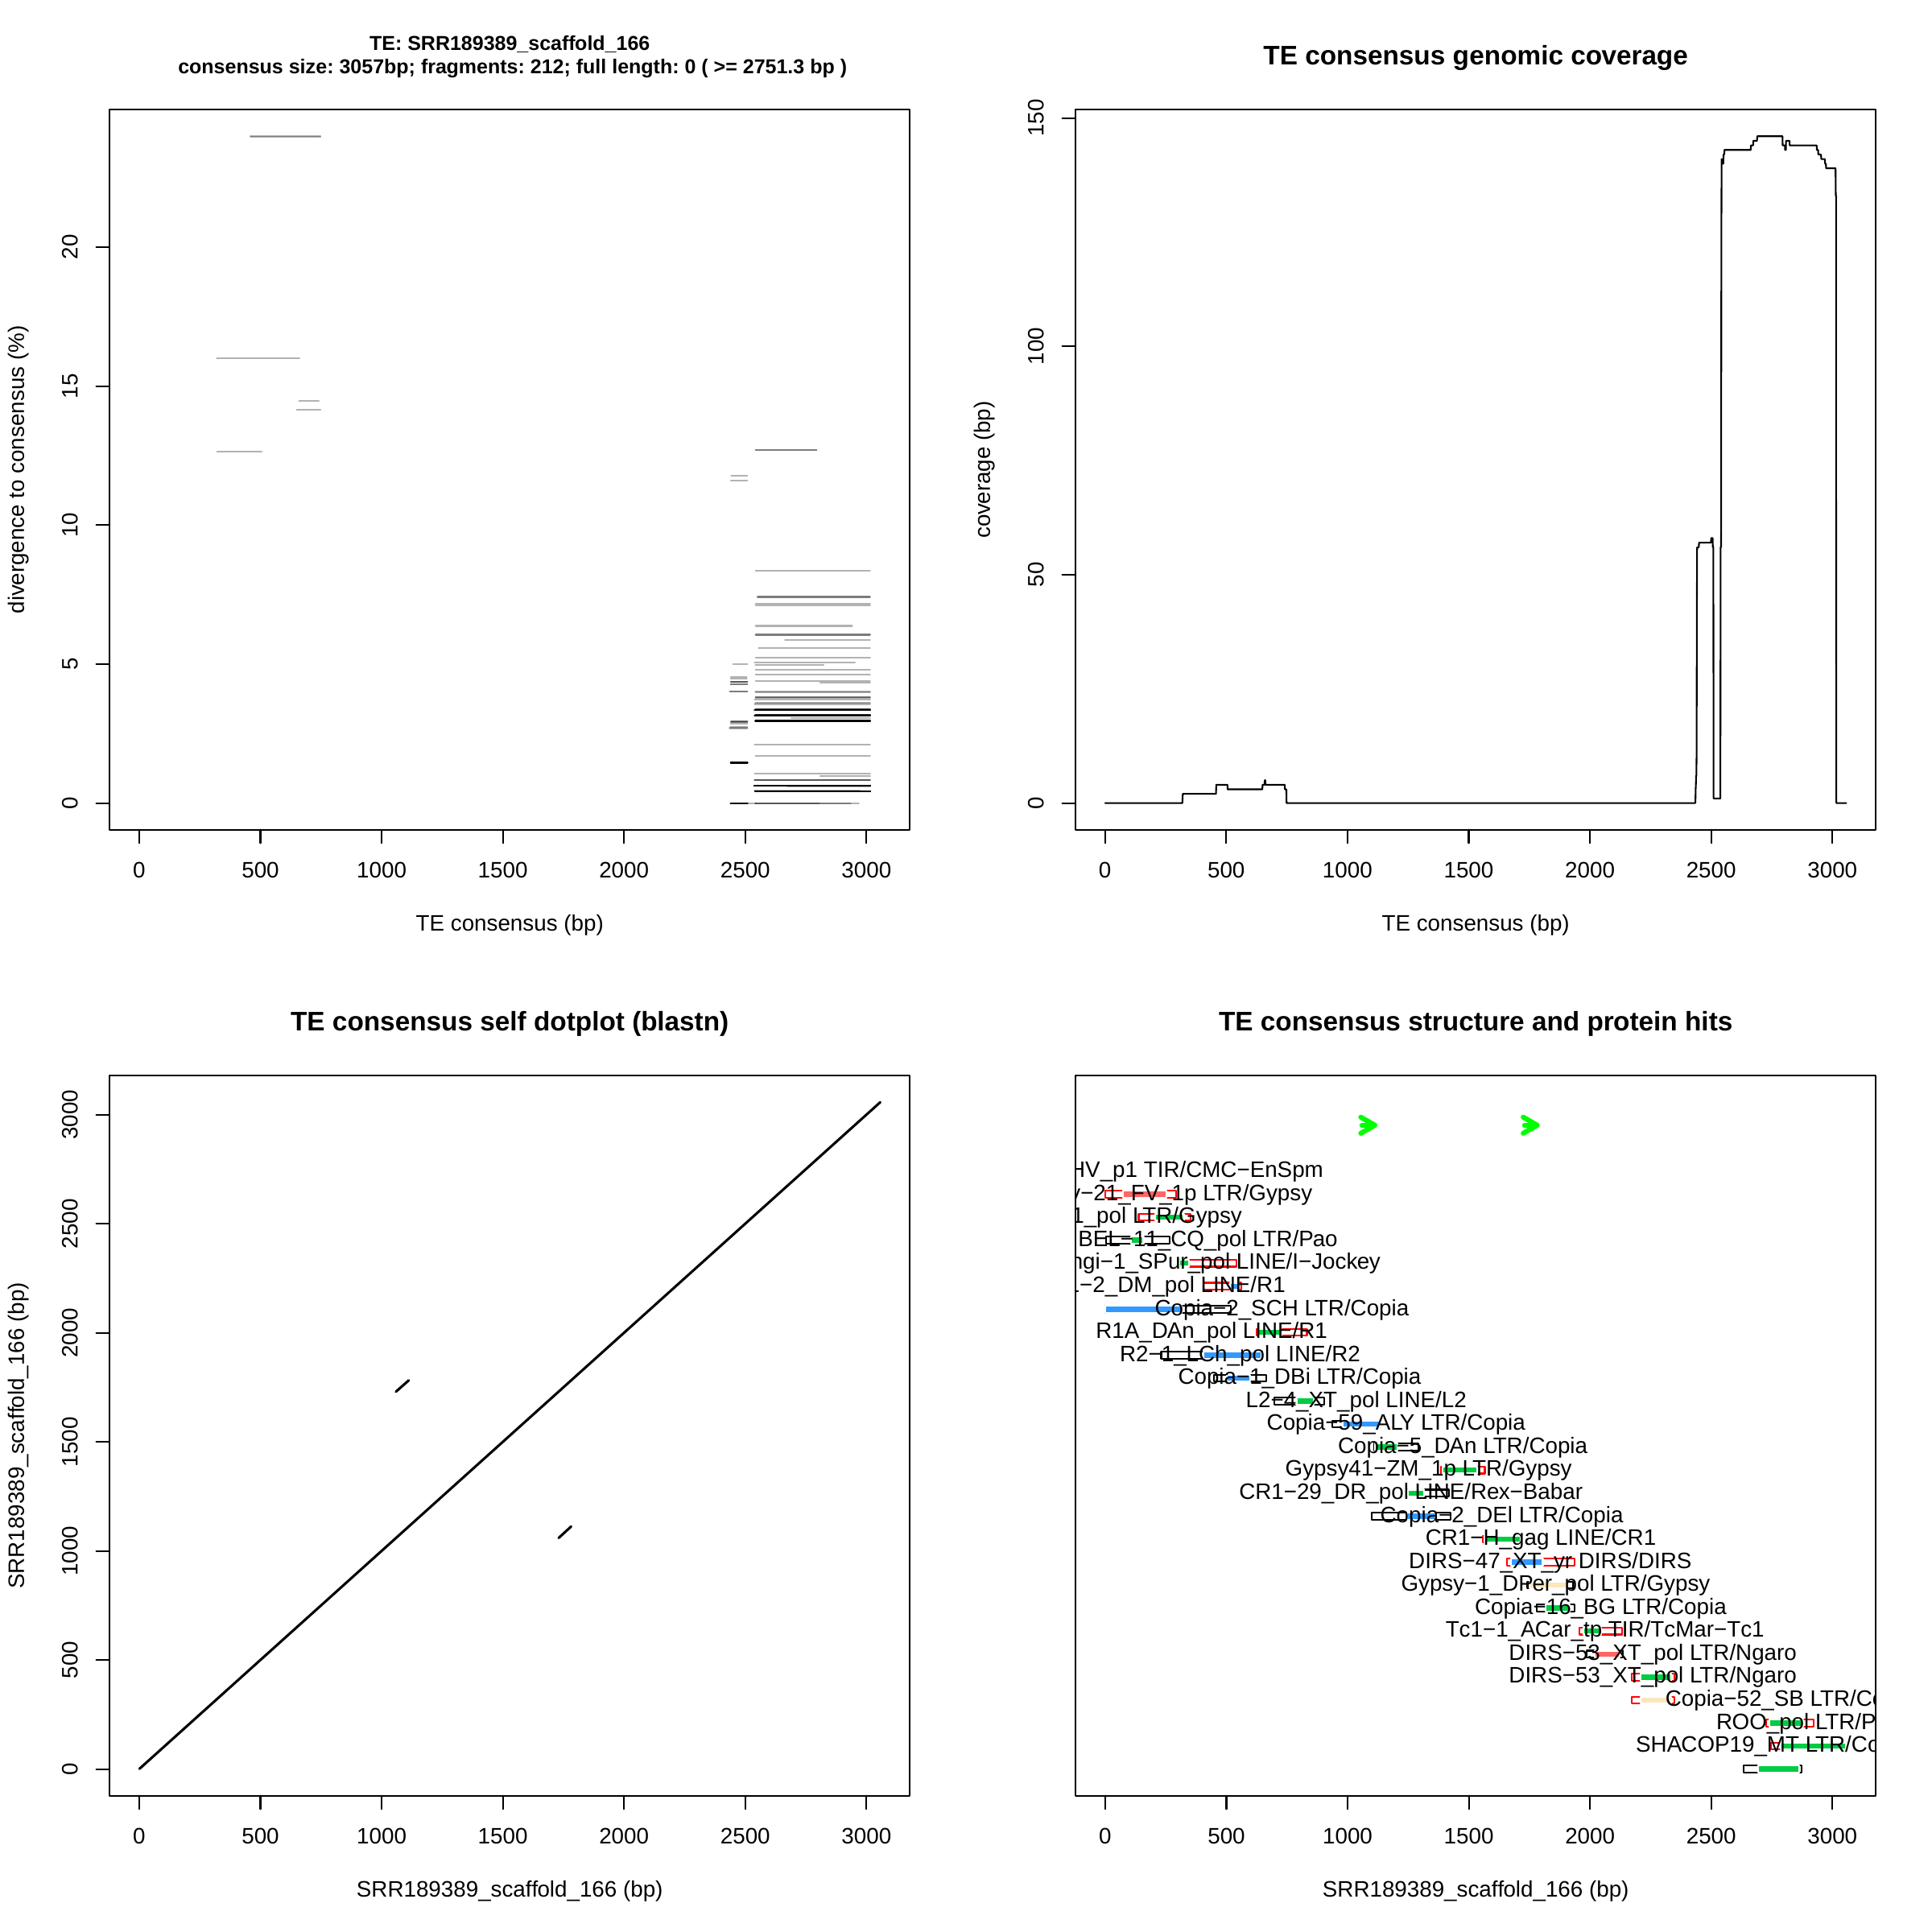

In [ ]:
#@markdown [TE-AID](https://github.com/clemgoub/TE-Aid) produces four plots:
#@markdown 1. (top left)  Each line represents a single TE copy/fragment. The plot shows which part of the consensus is covered by each copy and the sequence identity between them.
#@markdown 2. (top right) Genomic coverage of the consensus: TEs whose copies are frequently truncated will show differences in coverage across the consensus
#@markdown 3. (bottom left) Dotplot comparing the consensus to itself. This plot is useful for identifying structural features such as Long Terminal Repeats (LTRs) or Terminal Inverted Repeats (TIRs)
#@markdown 4. (bottom right) Structural and coding features including: TIR and LTR suggestions, open reading frames (ORFs) and TE protein hit annotations.

#@markdown _Filename of your scaffold FASTA file produced in Step 2._
Scaffold_Fasta_File = "SRR189389_scaffold_166.fa" #@param {type:"string"}
out=Scaffold_Fasta_File+".c2g.pdf"


!TE-Aid/TE-Aid -m 150 -q $Scaffold_Fasta_File -g novel_TE_project_Fall_2024/dmel-all-chromosome-r6.22.fasta

from pdf2image import convert_from_path
pdf=out
images = convert_from_path(pdf)
images[0]


### 8. Fill in the spreadsheet with information about your scaffold.

1. **Scaffold** The ID of the sequence/scaffold
2. **Population** The population that was sequenced
3. **Copies** Estimated TE copy number (reported in Step #2)
4. **Classification** Inferred species of origin (reported in Step #2)
5. **Cluster size** Number of individuals where this sequence was found (reported in Step #2)
6. **BLAST TE proteins** Top hit from the BLAST against RepBase proteins
6. **BLAST_nt_hit** E-value of top hit from _nt_ database
7. **BLAST_nt_query_cover** Query Coverage (%) of top hit from _nt_ database
8. **BLAST_nt_per_ident** Percent Identity of top hit from _nt_ database
9. **BLAST_wgs_hit** E-value of top hit from _WGS_ database
10. **BLAST_wgs_query_cover** Query Coverage (%) of top hit from _WGS_ database
11. **BLAST_wgs_per_ident** Percent Identity of top hit from _WGS_ database
6. **Censor name** The Name field from the highest scoring match
7. **Censor score** The score from the highest scoring match
8. **Censor length** The match length using the first two From..To fields from the highest scoring match



### 9. Save your completed notebook to GitHub
1. Select File -> Save a copy in GitHub
2. Look for `novel_TE_project` under the Repository dropdown menu
3. Make sure your notebook is named with the scaffold ID followed by an underscore and your name
4. Click `Ok`
5. If make additional changes to the notebook, repeat the steps above to save the revised version (with the same filename) in GitHub